Импортируем необходимые библиотеки

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

Напишем функцию, строящую гистограмму выборки бета-распределения случайной величины и теоретическую функцию плотности распределения с заданными начальными параметрами:

In [174]:
def show_beta(a, b):
    beta_rv = stats.beta(a, b)
    beta_sample = beta_rv.rvs(1000)
    x = np.linspace(0, 1, 100)
    # pdf - Probability density function
    pdf = beta_rv.pdf(x)
    plt.plot(x, pdf, color='blue', label='Theoretical pdf')
    plt.hist(beta_sample, normed=True, color='green',label='Actual sample')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    print 'a={:.2f}, b={:.2f}'.format(a, b)
    plt.show()

Функция, вычисляющая теоретические параметры бета-распределения в зависимости от начальных значений a и b:

In [178]:
def beta_params(a, b):
    mathematical_expectation = a / (a+b)
    dispersion = (a*b) / (((a+b) **2) * (a+b+1))
    standard_deviation = math.sqrt(dispersion)
    return mathematical_expectation, dispersion, standard_deviation

Функция генерации выборок и подсчета средних для формирования выборочного среднего:

In [179]:
def generate_means(sample, sub_sample_size, n=1000):
    means = []
    for i in range(n):
        sub_sample = sample[np.random.randint(0, len(sample), sub_sample_size)]
        means.append(np.mean(sub_sample))

    return means

Функция, осуществляющая эксперимент. 

Показывает исхдодное распределение.

Вычисляет теоретические значения параметров исходного распределения с заданными параметрами.

Построение выборочного среднего из исходного распределения с заданным параметром объема выборки n.

Сравнение основных параметров исходного распределения и полученного распределения выборочного среднего:

In [187]:
def experiment(a, b, range_n):
    show_beta(a, b)
    for n in range_n:
        # params of beta distribution
        t_m, t_dispersion, t_sigma = beta_params(a, b)
        
        beta_sample = stats.beta(a, b).rvs(1000)
        means = generate_means(beta_sample, n)
        # params of the sample mean
        m = np.mean(means)
        dispersion = np.var(means)
        # standard error of the mean
        std_error = t_sigma / math.sqrt(n)
        
        norm_rv = stats.norm(t_m, std_error)
        x = np.linspace(0, 1, 100)
        plt.hist(means,normed=True,label='actual')
        plt.plot(x, norm_rv.pdf(x),label='theoretical pdf')
        plt.legend()
        plt.ylabel('$f(x)$')
        plt.xlabel('$x$')
        plt.show()
    
        print 'Sample size: {:d}'.format(n)
        print 'Comparison (expected param - actual)'
        print 'Mathematical expectation: {:.2f} - {:.2f}'.format(t_m, m)
        print 'Dispersion: {:.5f} - {:.5f}'.format(t_dispersion / float(n), dispersion)
        print 'Standart deviation: {:.2f} - {:.2f}'.format(std_error, np.std(means))
        print 'Confidence interval 95%: ({:.2f} : {:.2f})'.format(m - 2 * std_error,  m + 2 * std_error)

Эксперименты для бета-распределения с различными исходными параметрами:

a=0.50, b=0.50


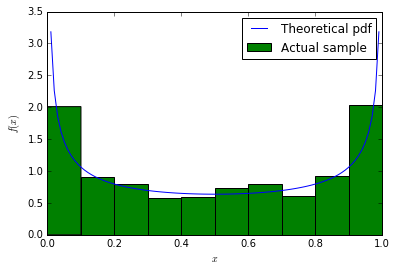

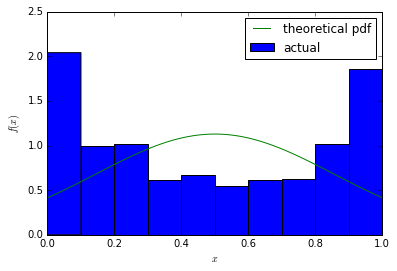

Sample size: 1
Comparison (expected param - actual)
Mathematical expectation: 0.50 - 0.48
Dispersion: 0.12500 - 0.12592
Standart deviation: 0.35 - 0.35
Confidence interval 95%: (-0.23 : 1.19)


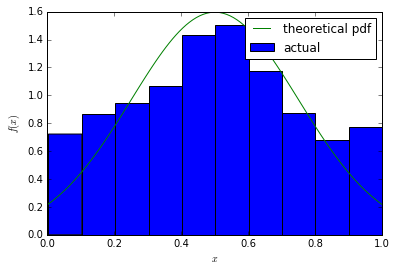

Sample size: 2
Comparison (expected param - actual)
Mathematical expectation: 0.50 - 0.50
Dispersion: 0.06250 - 0.06614
Standart deviation: 0.25 - 0.26
Confidence interval 95%: (-0.00 : 1.00)


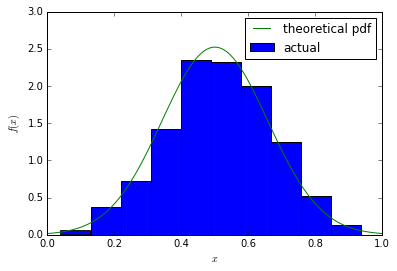

Sample size: 5
Comparison (expected param - actual)
Mathematical expectation: 0.50 - 0.51
Dispersion: 0.02500 - 0.02478
Standart deviation: 0.16 - 0.16
Confidence interval 95%: (0.19 : 0.83)


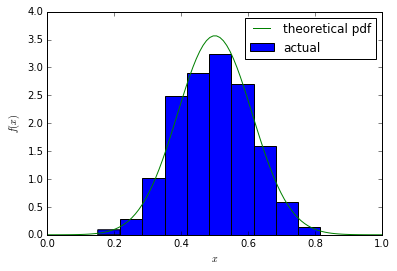

Sample size: 10
Comparison (expected param - actual)
Mathematical expectation: 0.50 - 0.50
Dispersion: 0.01250 - 0.01240
Standart deviation: 0.11 - 0.11
Confidence interval 95%: (0.27 : 0.72)


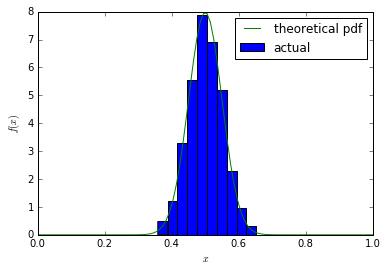

Sample size: 50
Comparison (expected param - actual)
Mathematical expectation: 0.50 - 0.50
Dispersion: 0.00250 - 0.00253
Standart deviation: 0.05 - 0.05
Confidence interval 95%: (0.40 : 0.60)


In [188]:
experiment(0.5, 0.5, [1, 2, 5, 10, 50])

a=2.00, b=5.00


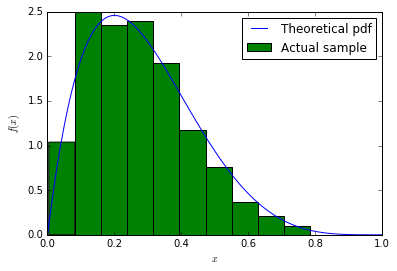

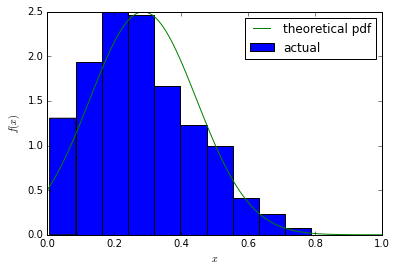

Sample size: 1
Comparison (expected param - actual)
Mathematical expectation: 0.29 - 0.28
Dispersion: 0.02551 - 0.02508
Standart deviation: 0.16 - 0.16
Confidence interval 95%: (-0.04 : 0.60)


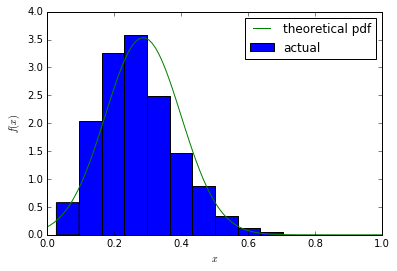

Sample size: 2
Comparison (expected param - actual)
Mathematical expectation: 0.29 - 0.27
Dispersion: 0.01276 - 0.01320
Standart deviation: 0.11 - 0.11
Confidence interval 95%: (0.04 : 0.50)


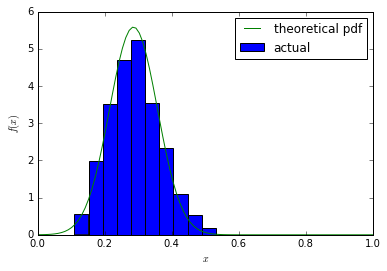

Sample size: 5
Comparison (expected param - actual)
Mathematical expectation: 0.29 - 0.29
Dispersion: 0.00510 - 0.00592
Standart deviation: 0.07 - 0.08
Confidence interval 95%: (0.15 : 0.43)


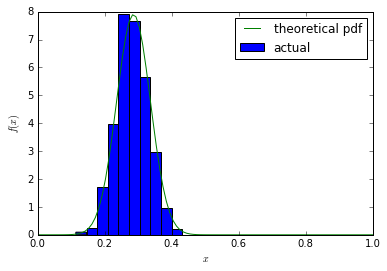

Sample size: 10
Comparison (expected param - actual)
Mathematical expectation: 0.29 - 0.28
Dispersion: 0.00255 - 0.00234
Standart deviation: 0.05 - 0.05
Confidence interval 95%: (0.18 : 0.38)


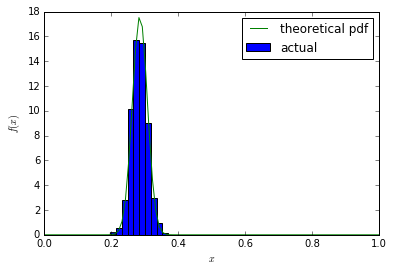

Sample size: 50
Comparison (expected param - actual)
Mathematical expectation: 0.29 - 0.28
Dispersion: 0.00051 - 0.00055
Standart deviation: 0.02 - 0.02
Confidence interval 95%: (0.24 : 0.33)


In [189]:
experiment(2.0, 5.0, [1, 2, 5, 10, 50])

a=1.00, b=3.00


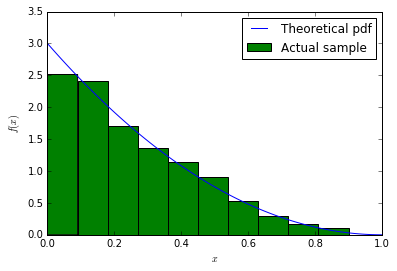

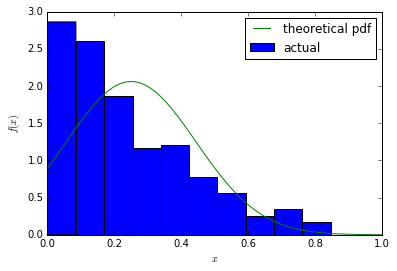

Sample size: 1
Comparison (expected param - actual)
Mathematical expectation: 0.25 - 0.24
Dispersion: 0.03750 - 0.03729
Standart deviation: 0.19 - 0.19
Confidence interval 95%: (-0.15 : 0.63)


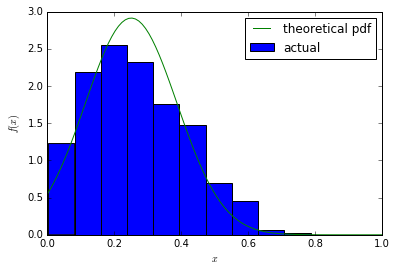

Sample size: 2
Comparison (expected param - actual)
Mathematical expectation: 0.25 - 0.27
Dispersion: 0.01875 - 0.02147
Standart deviation: 0.14 - 0.15
Confidence interval 95%: (-0.01 : 0.54)


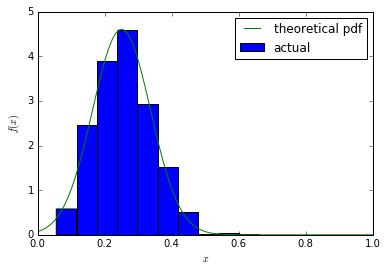

Sample size: 5
Comparison (expected param - actual)
Mathematical expectation: 0.25 - 0.26
Dispersion: 0.00750 - 0.00736
Standart deviation: 0.09 - 0.09
Confidence interval 95%: (0.08 : 0.43)


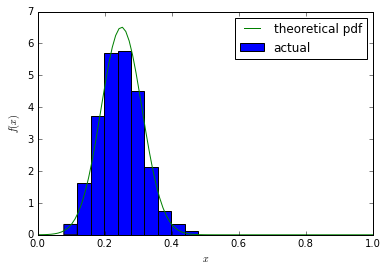

Sample size: 10
Comparison (expected param - actual)
Mathematical expectation: 0.25 - 0.25
Dispersion: 0.00375 - 0.00415
Standart deviation: 0.06 - 0.06
Confidence interval 95%: (0.13 : 0.37)


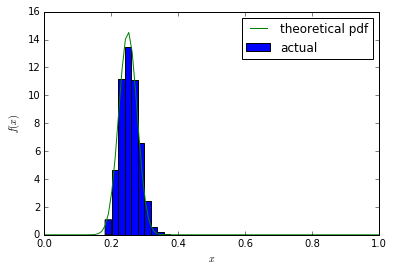

Sample size: 50
Comparison (expected param - actual)
Mathematical expectation: 0.25 - 0.25
Dispersion: 0.00075 - 0.00082
Standart deviation: 0.03 - 0.03
Confidence interval 95%: (0.20 : 0.31)


In [190]:
experiment(1.0, 3.0, [1, 2, 5, 10, 50])

a=5.00, b=1.00


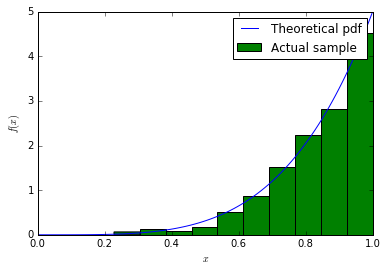

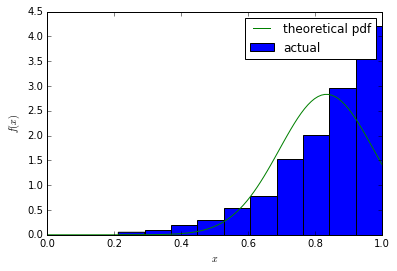

Sample size: 1
Comparison (expected param - actual)
Mathematical expectation: 0.83 - 0.83
Dispersion: 0.01984 - 0.02213
Standart deviation: 0.14 - 0.15
Confidence interval 95%: (0.55 : 1.11)


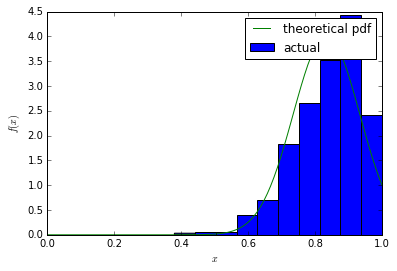

Sample size: 2
Comparison (expected param - actual)
Mathematical expectation: 0.83 - 0.84
Dispersion: 0.00992 - 0.00955
Standart deviation: 0.10 - 0.10
Confidence interval 95%: (0.64 : 1.04)


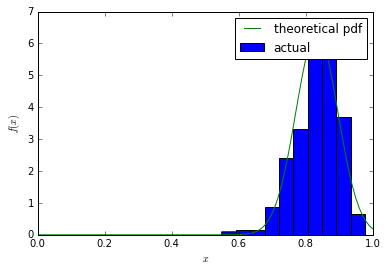

Sample size: 5
Comparison (expected param - actual)
Mathematical expectation: 0.83 - 0.83
Dispersion: 0.00397 - 0.00425
Standart deviation: 0.06 - 0.07
Confidence interval 95%: (0.71 : 0.96)


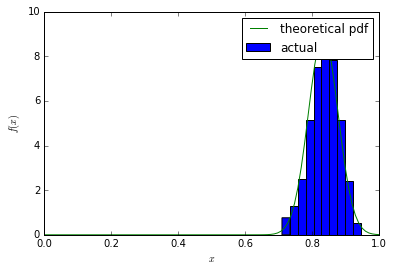

Sample size: 10
Comparison (expected param - actual)
Mathematical expectation: 0.83 - 0.84
Dispersion: 0.00198 - 0.00190
Standart deviation: 0.04 - 0.04
Confidence interval 95%: (0.75 : 0.93)


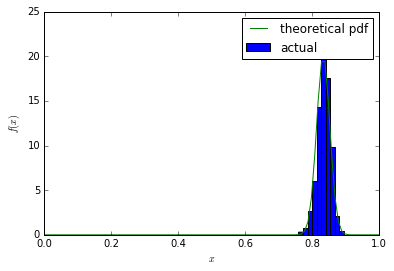

Sample size: 50
Comparison (expected param - actual)
Mathematical expectation: 0.83 - 0.83
Dispersion: 0.00040 - 0.00039
Standart deviation: 0.02 - 0.02
Confidence interval 95%: (0.80 : 0.87)


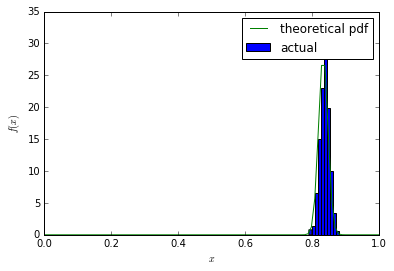

Sample size: 100
Comparison (expected param - actual)
Mathematical expectation: 0.83 - 0.84
Dispersion: 0.00020 - 0.00019
Standart deviation: 0.01 - 0.01
Confidence interval 95%: (0.81 : 0.87)


In [191]:
experiment(5.0, 1.0, [1, 2, 5, 10, 50, 100])

Выводы: 

На графиках видно, что с увеличением объема выборки для построения выборочного среднего, распределение выборочного среднего все больше похоже на нормальное, точность приближения при этом увеличивается, и уменьшается диапазон доверительного интервала. 

При этом математическое ожидание и дисперсия полученного нормального распределения равны ожидаемым значениям, а именно математическое ожидание совпадает с исходным, а дисперсия равна отношению дисперсии исходного распределения к объему выборки.
